In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [13]:
img = cv.imread('data\sample_floor.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

img2 = img.copy()

In [15]:
template = cv.imread('data\csd.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"

In [16]:
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

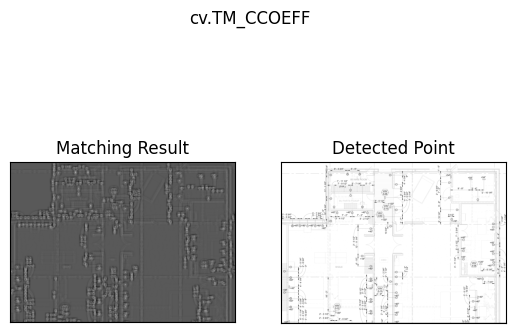

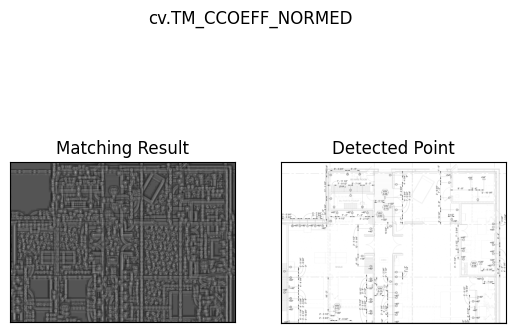

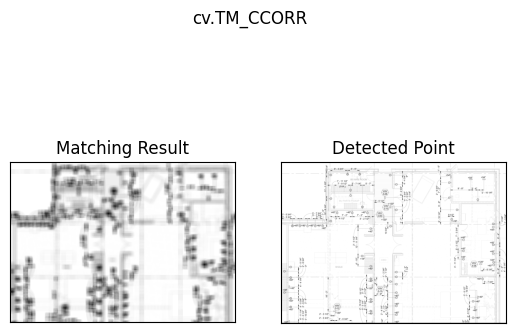

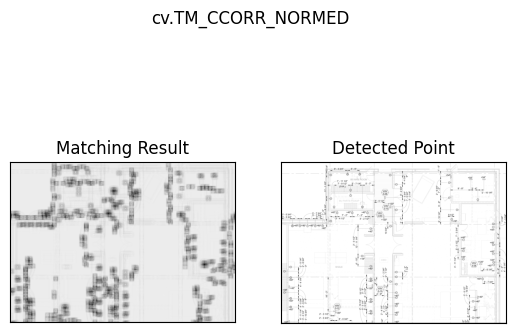

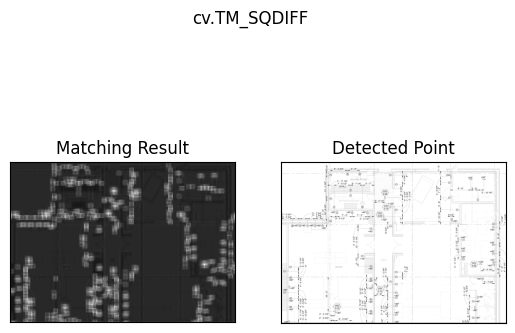

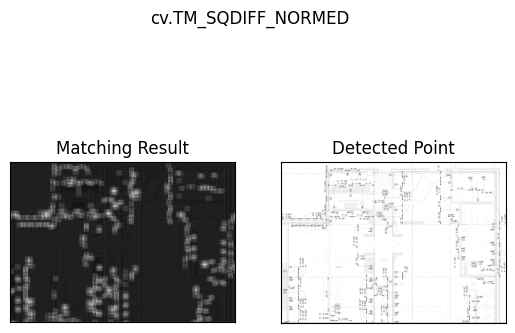

In [17]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [9]:
import cv2
import numpy as np

In [10]:
image = cv2.imread('data\sample_floor.jpg', cv2.IMREAD_GRAYSCALE)

# cv2.imshow('Image', image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

print("Floor Plan Shape:", image.shape)

Floor Plan Shape: (945, 1320)


In [11]:
# Load floor plan and template images
template = cv2.imread('data\csd.jpg', cv2.IMREAD_GRAYSCALE)


# cv2.imshow('Resized Image', template)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

print("Template Shape:", template.shape)

Template Shape: (27, 27)


In [19]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [23]:
image = cv2.imread('data\sample_floor.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('data\csd.jpg', cv2.IMREAD_GRAYSCALE)
# Perform template matching
result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# Set threshold for detection
threshold = 0.8
loc = np.where(result >= threshold)

# Draw rectangles around detected matches
w, h = template.shape[::-1]
for pt in zip(*loc[::-1]):  # Switch columns and rows
    cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)

# Display results
cv2.imshow('Detected Icons', image)
cv2.waitKey(0)
cv2.destroyAllWindows()